In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df = pd.read_csv('Dataset_combined\Total_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Timestamp,W
0,2013-05-24 00:00:00,282.744995
1,2013-05-24 00:00:01,288.757996
2,2013-05-24 00:00:02,288.757996
3,2013-05-24 00:00:03,297.394012
4,2013-05-24 00:00:04,303.722992
...,...,...
4391054,2013-08-05 15:33:10,711.764891
4391055,2013-08-05 15:33:11,711.764891
4391056,2013-08-05 15:33:12,711.911695
4391057,2013-08-05 15:33:15,712.182676


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

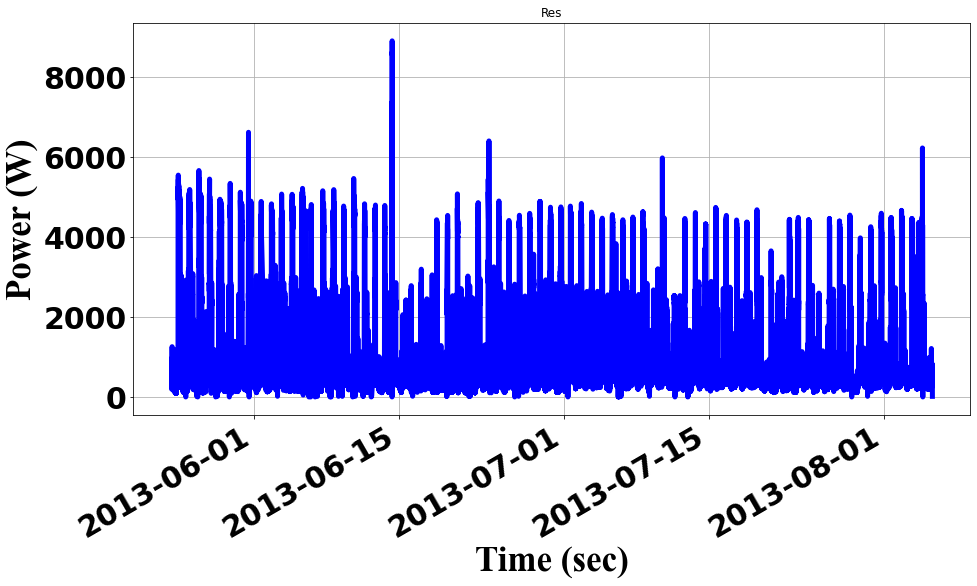

In [308]:
    df.groupby('Timestamp')['W'].mean().plot(kind='line',linewidth= 5,figsize=(15,8),color='blue',fontsize=30)
    plt.ylabel('Power (W)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xlabel('Time (sec)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.title('Res')
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")
    plt.grid()
    plt.savefig('')
    plt.show()

In [4]:
df = df.set_index('Timestamp')

In [5]:
df

,W
Timestamp,
2013-05-24 00:00:00,282.744995
2013-05-24 00:00:01,288.757996
2013-05-24 00:00:02,288.757996
2013-05-24 00:00:03,297.394012
2013-05-24 00:00:04,303.722992
...,...
2013-08-05 15:33:10,711.764891
2013-08-05 15:33:11,711.764891
2013-08-05 15:33:12,711.911695


In [139]:
#df['KW'] = df['W']/1000

In [140]:
#df.drop('W',axis=1,inplace=True)

In [142]:
#df = df.reset_index()

0       2013-05-24 00:00:00
1       2013-05-24 00:00:01
2       2013-05-24 00:00:02
3       2013-05-24 00:00:03
4       2013-05-24 00:00:04
                ...        
78286   2013-05-24 23:59:55
78287   2013-05-24 23:59:56
78288   2013-05-24 23:59:57
78289   2013-05-24 23:59:58
78290   2013-05-24 23:59:59
Name: Timestamp, Length: 78291, dtype: datetime64[ns]
      Timestamp           W
0      00:00:00  282.744995
1      00:00:01  288.757996
2      00:00:02  288.757996
3      00:00:03  297.394012
4      00:00:04  303.722992
...         ...         ...
78286  23:59:55  248.084000
78287  23:59:56  253.901001
78288  23:59:57  247.904999
78289  23:59:58  254.763000
78290  23:59:59  255.453003

[78291 rows x 2 columns]


<ipython-input-194-8e5764fa0dcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-194-8e5764fa0dcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

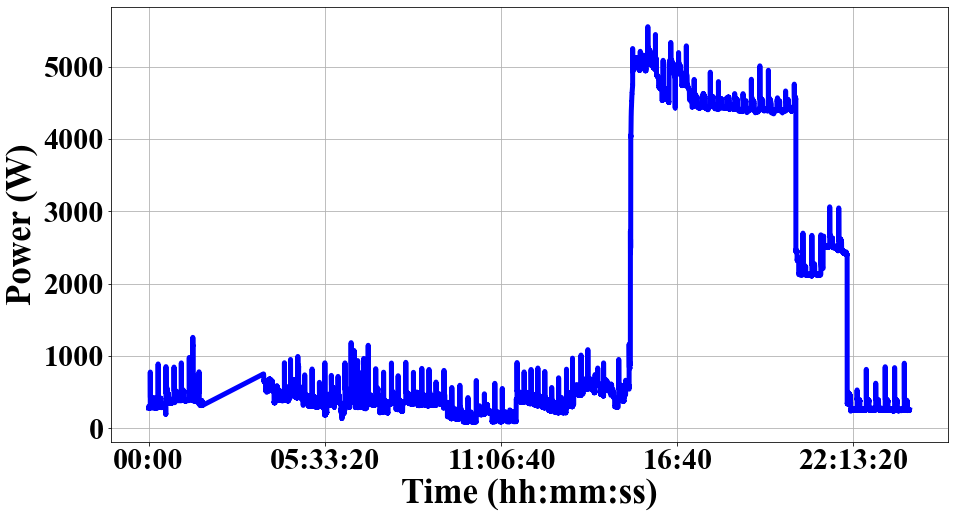

In [194]:
    df_1 = df[(df['Timestamp'] >='2013-05-24 00:00:00') & (df['Timestamp'] < '2013-05-25 00:00:00')]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['W'].mean().plot(kind='line',linewidth= 5,figsize=(15,8),color='blue',fontsize=30)
    plt.ylabel('Power (W)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xlabel('Time (hh:mm:ss)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    #plt.title('Residential single day data',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xticks(fontweight="bold",fontname="Times New Roman")
    plt.yticks(fontweight="bold",fontname="Times New Roman")
    plt.grid()
    plt.savefig('Residential_1day.pdf')
    plt.savefig('Residential_1day.png')
    plt.show()

In [6]:
df = df.resample('min').mean()

In [7]:
df

,W
Timestamp,
2013-05-24 00:00:00,285.566998
2013-05-24 00:01:00,284.513632
2013-05-24 00:02:00,283.382776
2013-05-24 00:03:00,419.192352
2013-05-24 00:04:00,418.725591
...,...
2013-08-05 15:29:00,507.936435
2013-08-05 15:30:00,537.798291
2013-08-05 15:31:00,636.553161


In [8]:
df = df.reset_index()

In [9]:
df['KW'] = df['W']/1000

In [10]:
df.drop('W',axis=1,inplace=True)

In [11]:
df['Hour']=pd.to_datetime(df['Timestamp']).dt.hour

In [12]:
df['Minute']=pd.to_datetime(df['Timestamp']).dt.minute

In [13]:
#df['Second']=pd.to_datetime(df['Timestamp']).dt.second

In [14]:
df

,Timestamp,KW,Hour,Minute
0,2013-05-24 00:00:00,0.285567,0,0
1,2013-05-24 00:01:00,0.284514,0,1
2,2013-05-24 00:02:00,0.283383,0,2
3,2013-05-24 00:03:00,0.419192,0,3
4,2013-05-24 00:04:00,0.418726,0,4
...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29
106050,2013-08-05 15:30:00,0.537798,15,30
106051,2013-08-05 15:31:00,0.636553,15,31
106052,2013-08-05 15:32:00,0.694195,15,32


In [15]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Timestamp'].dtype

dtype('<M8[ns]')

In [16]:
df['Day']=pd.to_datetime(df['Timestamp']).dt.dayofweek
df

,Timestamp,KW,Hour,Minute,Day
0,2013-05-24 00:00:00,0.285567,0,0,4
1,2013-05-24 00:01:00,0.284514,0,1,4
2,2013-05-24 00:02:00,0.283383,0,2,4
3,2013-05-24 00:03:00,0.419192,0,3,4
4,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29,0
106050,2013-08-05 15:30:00,0.537798,15,30,0
106051,2013-08-05 15:31:00,0.636553,15,31,0
106052,2013-08-05 15:32:00,0.694195,15,32,0


In [17]:
df1=df.copy()

In [18]:
df

,Timestamp,KW,Hour,Minute,Day
0,2013-05-24 00:00:00,0.285567,0,0,4
1,2013-05-24 00:01:00,0.284514,0,1,4
2,2013-05-24 00:02:00,0.283383,0,2,4
3,2013-05-24 00:03:00,0.419192,0,3,4
4,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29,0
106050,2013-08-05 15:30:00,0.537798,15,30,0
106051,2013-08-05 15:31:00,0.636553,15,31,0
106052,2013-08-05 15:32:00,0.694195,15,32,0


In [280]:
df1['Timestamp'] = df1['Timestamp'].dt.strftime('%m-%d')

In [281]:
df1

,Timestamp,KW,Hour,Minute,Day
0,05-24,0.285567,0,0,4
1,05-24,0.284514,0,1,4
2,05-24,0.283383,0,2,4
3,05-24,0.419192,0,3,4
4,05-24,0.418726,0,4,4
...,...,...,...,...,...
106049,08-05,0.507936,15,29,0
106050,08-05,0.537798,15,30,0
106051,08-05,0.636553,15,31,0
106052,08-05,0.694195,15,32,0


In [282]:
df

,Timestamp,KW,Hour,Minute,Day
0,2013-05-24 00:00:00,0.285567,0,0,4
1,2013-05-24 00:01:00,0.284514,0,1,4
2,2013-05-24 00:02:00,0.283383,0,2,4
3,2013-05-24 00:03:00,0.419192,0,3,4
4,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29,0
106050,2013-08-05 15:30:00,0.537798,15,30,0
106051,2013-08-05 15:31:00,0.636553,15,31,0
106052,2013-08-05 15:32:00,0.694195,15,32,0


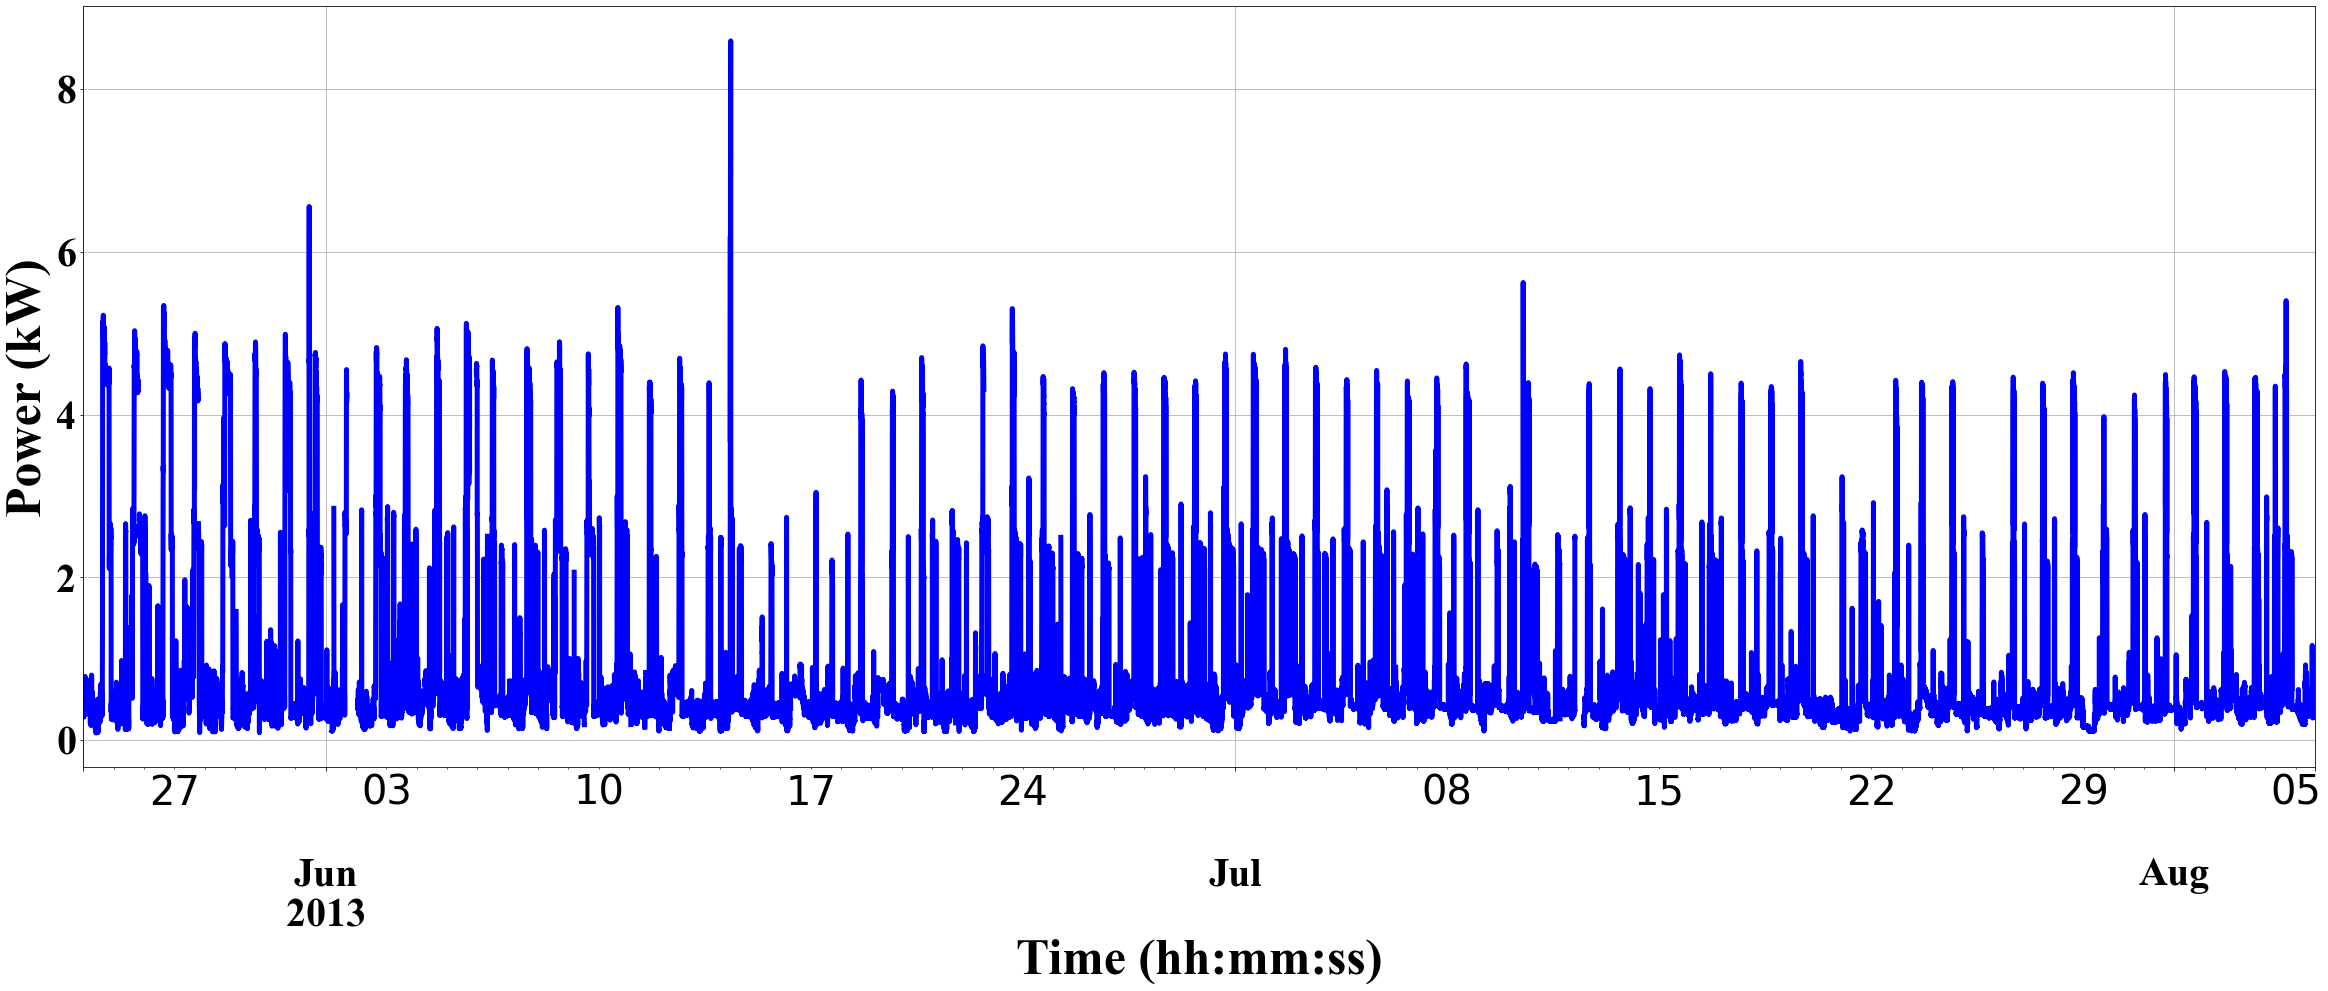

In [325]:
df.groupby('Timestamp')['KW'].mean().plot(kind='line',linewidth= 5,figsize=(40,14),color='blue',fontsize=40)
plt.ylabel('Power (kW)',fontsize=50,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Time (hh:mm:ss)',fontsize=50,fontname="Times New Roman",fontweight="bold")
#plt.title('Residential building energy consumption in kW',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xticks(fontweight="bold",fontname="Times New Roman")
plt.yticks(fontweight="bold",fontname="Times New Roman")
plt.grid()
plt.savefig('Residential_1.pdf')
plt.savefig('Residential_1.png')
plt.show()

In [164]:
df

,Timestamp,KW,Hour,Minute,Day
0,2013-05-24 00:00:00,0.285567,0,0,4
1,2013-05-24 00:01:00,0.284514,0,1,4
2,2013-05-24 00:02:00,0.283383,0,2,4
3,2013-05-24 00:03:00,0.419192,0,3,4
4,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29,0
106050,2013-08-05 15:30:00,0.537798,15,30,0
106051,2013-08-05 15:31:00,0.636553,15,31,0
106052,2013-08-05 15:32:00,0.694195,15,32,0


1440   2013-05-25 00:00:00
1441   2013-05-25 00:01:00
1442   2013-05-25 00:02:00
1443   2013-05-25 00:03:00
1444   2013-05-25 00:04:00
               ...        
2875   2013-05-25 23:55:00
2876   2013-05-25 23:56:00
2877   2013-05-25 23:57:00
2878   2013-05-25 23:58:00
2879   2013-05-25 23:59:00
Name: Timestamp, Length: 1440, dtype: datetime64[ns]
     Timestamp        KW  Hour  Minute  Day
1440  00:00:00  0.257297     0       0    5
1441  00:01:00  0.255767     0       1    5
1442  00:02:00  0.255701     0       2    5
1443  00:03:00  0.256285     0       3    5
1444  00:04:00  0.255179     0       4    5
...        ...       ...   ...     ...  ...
2875  23:55:00  0.288191    23      55    5
2876  23:56:00  0.266999    23      56    5
2877  23:57:00  0.268290    23      57    5
2878  23:58:00  0.267805    23      58    5
2879  23:59:00  0.269055    23      59    5

[1440 rows x 5 columns]


<ipython-input-133-ca76318a324d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-133-ca76318a324d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

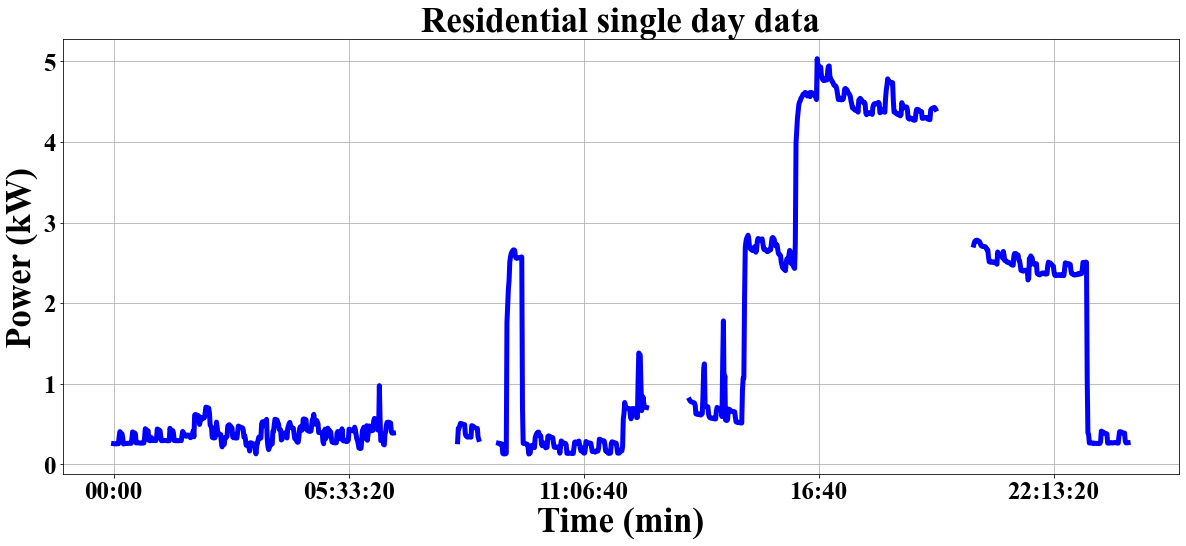

In [133]:
    df_1 = df[(df['Timestamp'] >='2013-05-2 00:00:00') & (df['Timestamp'] < '2013-05-26 00:00:00')]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['KW'].mean().plot(kind='line',linewidth= 5,figsize=(20,8),color='blue',fontsize=25)
    plt.ylabel('Power (kW)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xlabel('Time (hh:mm:ss)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    #plt.title('Residential single day data',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xticks(fontweight="bold",fontname="Times New Roman")
    plt.yticks(fontweight="bold",fontname="Times New Roman")
    plt.grid()
    plt.savefig('Residential_1day.pdf')
    plt.savefig('Residential_1day.png')
    plt.show()

In [52]:
df.describe()

,KW,Hour,Minute,Day
count,99486.000000,106054.000000,106054.000000,106054.000000
mean,0.819911,11.462934,29.495832,3.055047
std,1.040840,6.915774,17.317863,2.016978
min,0.089211,0.000000,0.000000,0.000000
25%,0.329018,5.000000,14.000000,1.000000
50%,0.423572,11.000000,29.000000,3.000000
75%,0.596999,17.000000,44.000000,5.000000
max,8.594846,23.000000,59.000000,6.000000


In [19]:
df1 = pd.read_csv('EV_Dataset/EV.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,EV
0,0
1,0
2,0
3,0
4,0
...,...
105115,0
105116,0
105117,0
105118,0


In [82]:
#df1.columns

In [83]:
#df2 = df1.groupby('User_ID').get_group('AdO3-4')

In [84]:
#df2

In [85]:
#df2.drop(['date_to', 'User_ID', 'session_ID', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW'],axis=1,inplace=True)

In [86]:
#df2.dropna(inplace=True)

In [87]:
#df2

In [88]:
#df2['date_from']=pd.to_datetime(df2['date_from'])

In [89]:
#df2

In [90]:
#df1.groupby('date_from')['Synthetic_3_6kW'].mean().plot(kind='line',linewidth= 2,figsize=(20,8),color='blue',fontsize=18)

In [77]:
#df3 = df2[(df2['date_from'] >='2019-01-01 00:00:00') & (df2['date_from'] < '2020-01-01 00:00:00')]

In [22]:
#df3

In [21]:
    #df_1 = df2[(df2['date_from'] >='25-12-2018 10:00:00') & (df2['date_from'] < '26-12-2018 10:00:00')]
    #print( df_1['date_from'])
    #df_1['Time']= pd.to_datetime(df_1['date_from']).dt.time
    #df_1['timestamp']=df_1['Time']
    #df_1.drop('Time',axis=1,inplace=True)
    #print(df_1)
    #df_1.groupby('timestamp')['Synthetic_3_6kW'].mean().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    #plt.ylabel('Power',fontsize=18)
    #plt.xlabel('2012-12-21',fontsize=18)
    #plt.title('Electrice Vehicle',fontsize=18)
    #plt.show()

In [22]:
#df1['date_from']=pd.to_datetime(df1['date_from'])

In [23]:
#df1 = df1.set_index('date_from')

In [24]:
#df1.rename(columns = {'Synthetic_3_6kW':'KW1'}, inplace = True)

In [25]:
#df1

In [26]:
#df1 = df1.reset_index()

In [27]:
#df1 = df1[(df1['date_from'] >= '2019-05-24') & (df1['date_from'] < '2019-08-05 16:00:00')]

In [28]:
df1

,EV
0,0
1,0
2,0
3,0
4,0
...,...
105115,0
105116,0
105117,0
105118,0


In [94]:
#df1 = df1.reset_index()

In [95]:
#df1.drop('index',axis=1,inplace=True)

In [96]:
#df1

In [31]:
#df1['date_from'] = pd.to_datetime(df1['date_from'])
#df1['date_from'] = df1['date_from'].apply(lambda x: x.replace(year = x.year -6 ))

In [29]:
#df1

In [20]:
df2 = pd.concat([df1,df],axis=1)

In [21]:
df2.isna().sum()
df2.dropna(inplace=True)
#median = df2['KW1'].median()
#df2['KW1'].fillna(value=median,inplace=True)

In [22]:
df2

,EV,Timestamp,KW,Hour,Minute,Day
0,0.0,2013-05-24 00:00:00,0.285567,0,0,4
1,0.0,2013-05-24 00:01:00,0.284514,0,1,4
2,0.0,2013-05-24 00:02:00,0.283383,0,2,4
3,0.0,2013-05-24 00:03:00,0.419192,0,3,4
4,0.0,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...,...
105115,0.0,2013-08-04 23:55:00,0.395570,23,55,6
105116,0.0,2013-08-04 23:56:00,0.394976,23,56,6
105117,0.0,2013-08-04 23:57:00,0.393632,23,57,6
105118,0.0,2013-08-04 23:58:00,0.379694,23,58,6


In [23]:
df2.drop(['Hour','Day','Minute'],axis=1,inplace =True)

In [24]:
df2

,EV,Timestamp,KW
0,0.0,2013-05-24 00:00:00,0.285567
1,0.0,2013-05-24 00:01:00,0.284514
2,0.0,2013-05-24 00:02:00,0.283383
3,0.0,2013-05-24 00:03:00,0.419192
4,0.0,2013-05-24 00:04:00,0.418726
...,...,...,...
105115,0.0,2013-08-04 23:55:00,0.395570
105116,0.0,2013-08-04 23:56:00,0.394976
105117,0.0,2013-08-04 23:57:00,0.393632
105118,0.0,2013-08-04 23:58:00,0.379694


In [25]:
df2.EV.unique()

array([0., 3.])

0      2013-05-24 00:00:00
1      2013-05-24 00:01:00
2      2013-05-24 00:02:00
3      2013-05-24 00:03:00
4      2013-05-24 00:04:00
               ...        
1435   2013-05-24 23:55:00
1436   2013-05-24 23:56:00
1437   2013-05-24 23:57:00
1438   2013-05-24 23:58:00
1439   2013-05-24 23:59:00
Name: Timestamp, Length: 1326, dtype: datetime64[ns]
       EV Timestamp        KW
0     0.0  00:00:00  0.285567
1     0.0  00:01:00  0.284514
2     0.0  00:02:00  0.283383
3     0.0  00:03:00  0.419192
4     0.0  00:04:00  0.418726
...   ...       ...       ...
1435  0.0  23:55:00  0.291120
1436  0.0  23:56:00  0.251896
1437  0.0  23:57:00  0.252424
1438  0.0  23:58:00  0.252388
1439  0.0  23:59:00  0.251923

[1326 rows x 3 columns]


<ipython-input-192-3e388ca327ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-192-3e388ca327ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

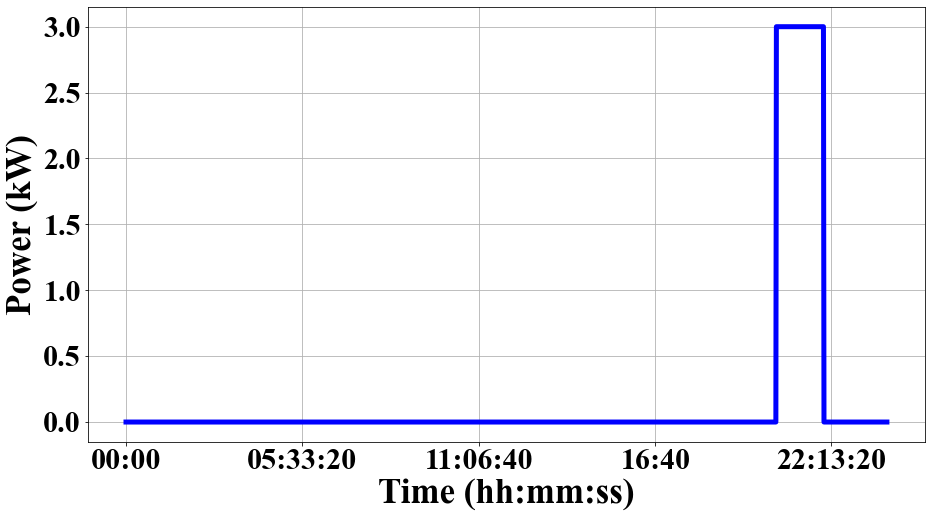

In [192]:
    df_1 = df2[(df2['Timestamp'] >='2013-05-24 00:00:00') & (df2['Timestamp'] < '2013-05-25 00:00:00')]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['EV'].mean().plot(kind='line',linewidth= 5,figsize=(15,8),color='blue',fontsize=30)
    plt.ylabel('Power (kW)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xlabel('Time (hh:mm:ss)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    #plt.title('Electric Vehicle single day data',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xticks(fontweight="bold",fontname="Times New Roman")
    plt.yticks(fontweight="bold",fontname="Times New Roman")
    plt.grid()
    plt.savefig('Electric_vehicle_1day.pdf')
    plt.savefig('Electric_vehicle_1day.png')
    plt.show()

In [26]:
df2['kW2'] = df2['EV'] + df2['KW']

In [27]:
df2

,EV,Timestamp,KW,kW2
0,0.0,2013-05-24 00:00:00,0.285567,0.285567
1,0.0,2013-05-24 00:01:00,0.284514,0.284514
2,0.0,2013-05-24 00:02:00,0.283383,0.283383
3,0.0,2013-05-24 00:03:00,0.419192,0.419192
4,0.0,2013-05-24 00:04:00,0.418726,0.418726
...,...,...,...,...
105115,0.0,2013-08-04 23:55:00,0.395570,0.395570
105116,0.0,2013-08-04 23:56:00,0.394976,0.394976
105117,0.0,2013-08-04 23:57:00,0.393632,0.393632
105118,0.0,2013-08-04 23:58:00,0.379694,0.379694


In [294]:
df3 =df2.copy()

In [296]:
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])+pd.DateOffset(years= 7)

In [297]:
df3

,EV,Timestamp,KW,kW2
0,0.0,2020-05-24 00:00:00,0.285567,0.285567
1,0.0,2020-05-24 00:01:00,0.284514,0.284514
2,0.0,2020-05-24 00:02:00,0.283383,0.283383
3,0.0,2020-05-24 00:03:00,0.419192,0.419192
4,0.0,2020-05-24 00:04:00,0.418726,0.418726
...,...,...,...,...
105115,0.0,2020-08-04 23:55:00,0.395570,0.395570
105116,0.0,2020-08-04 23:56:00,0.394976,0.394976
105117,0.0,2020-08-04 23:57:00,0.393632,0.393632
105118,0.0,2020-08-04 23:58:00,0.379694,0.379694


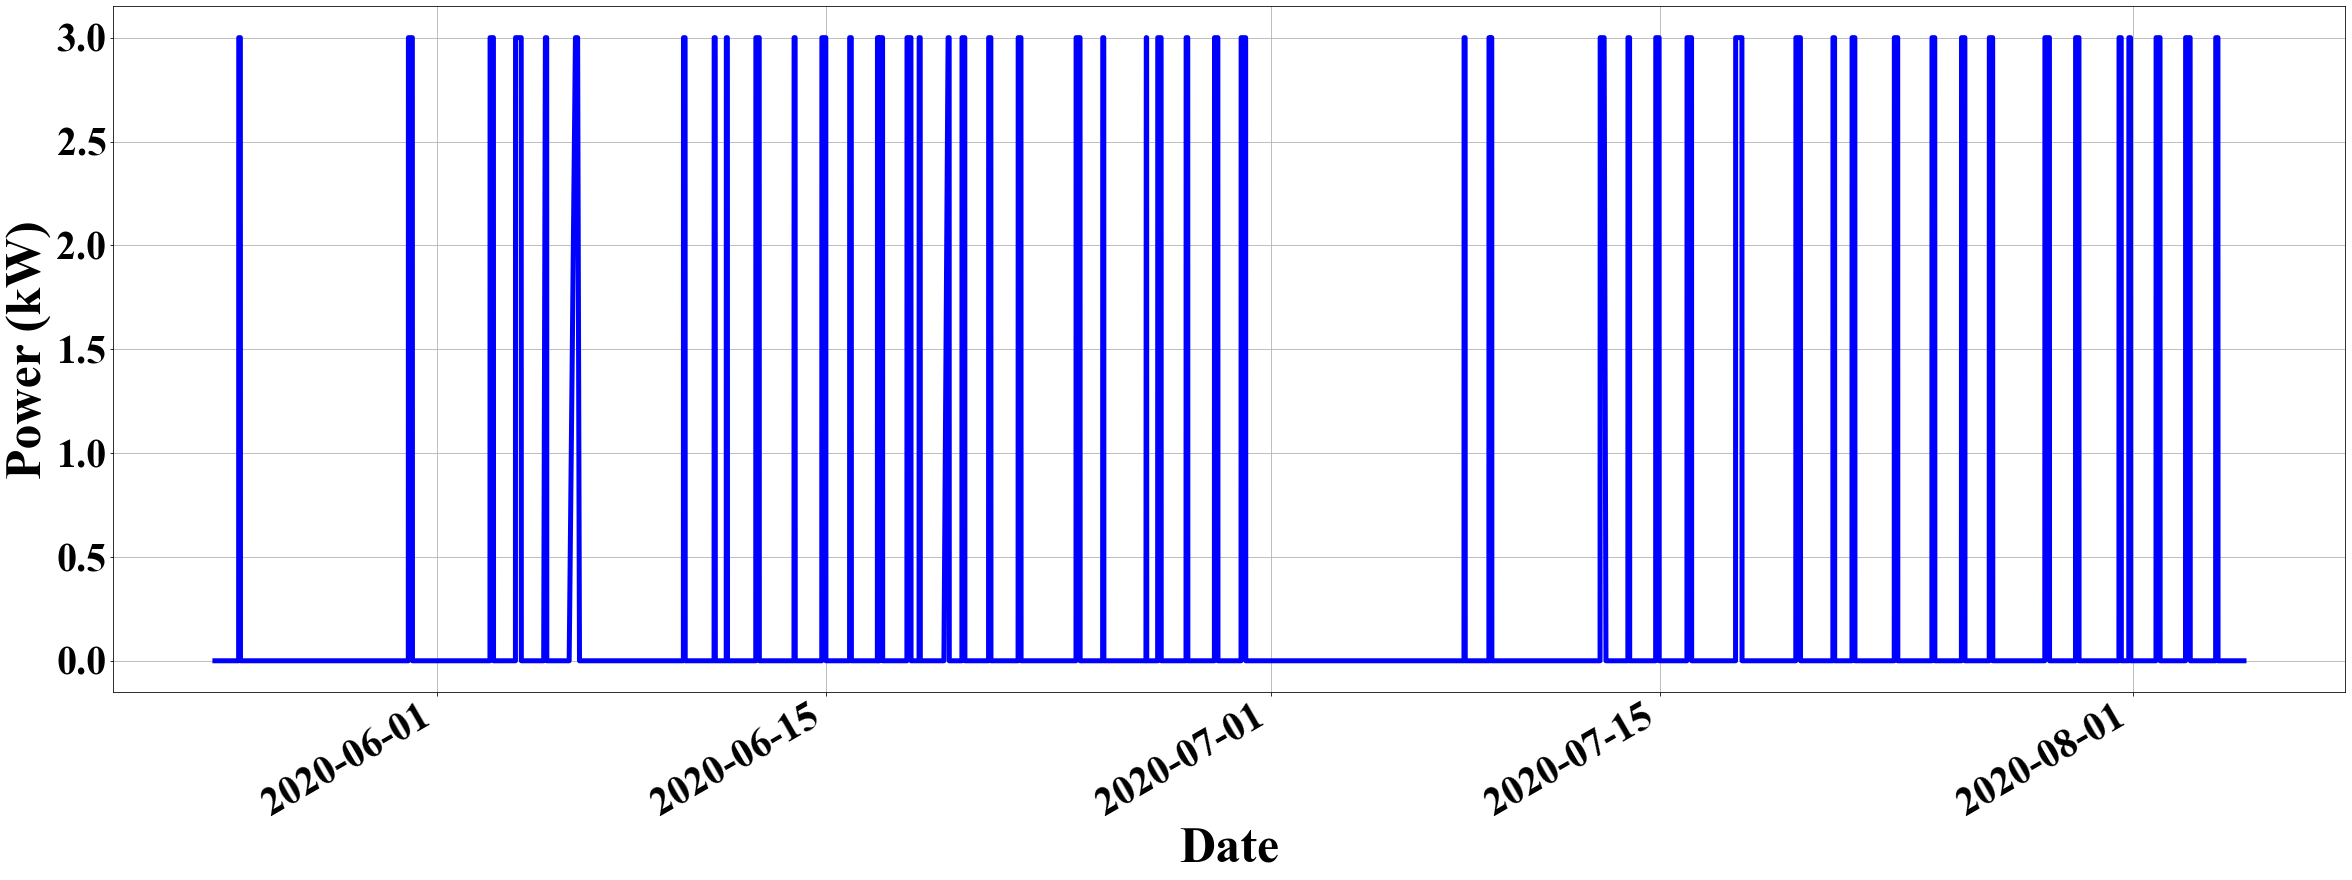

In [305]:
df2.groupby('Timestamp')['EV'].median().plot(kind='line',linewidth= 5,figsize=(40,14),color='blue',fontsize=40)
plt.ylabel('Power (kW)',fontsize=50,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Date',fontsize=50,fontname="Times New Roman",fontweight="bold")
#plt.title('Electric vehicle energy consumption',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xticks(fontweight="bold",fontname="Times New Roman")
plt.yticks(fontweight="bold",fontname="Times New Roman")
plt.grid()
plt.savefig('EV_long.pdf')
plt.savefig('EV_1.png')
plt.show()

0      2013-05-24 00:00:00
1      2013-05-24 00:01:00
2      2013-05-24 00:02:00
3      2013-05-24 00:03:00
4      2013-05-24 00:04:00
               ...        
1435   2013-05-24 23:55:00
1436   2013-05-24 23:56:00
1437   2013-05-24 23:57:00
1438   2013-05-24 23:58:00
1439   2013-05-24 23:59:00
Name: Timestamp, Length: 1326, dtype: datetime64[ns]
       EV Timestamp        KW       kW2
0     0.0  00:00:00  0.285567  0.285567
1     0.0  00:01:00  0.284514  0.284514
2     0.0  00:02:00  0.283383  0.283383
3     0.0  00:03:00  0.419192  0.419192
4     0.0  00:04:00  0.418726  0.418726
...   ...       ...       ...       ...
1435  0.0  23:55:00  0.291120  0.291120
1436  0.0  23:56:00  0.251896  0.251896
1437  0.0  23:57:00  0.252424  0.252424
1438  0.0  23:58:00  0.252388  0.252388
1439  0.0  23:59:00  0.251923  0.251923

[1326 rows x 4 columns]


<ipython-input-220-fda2297351b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-220-fda2297351b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

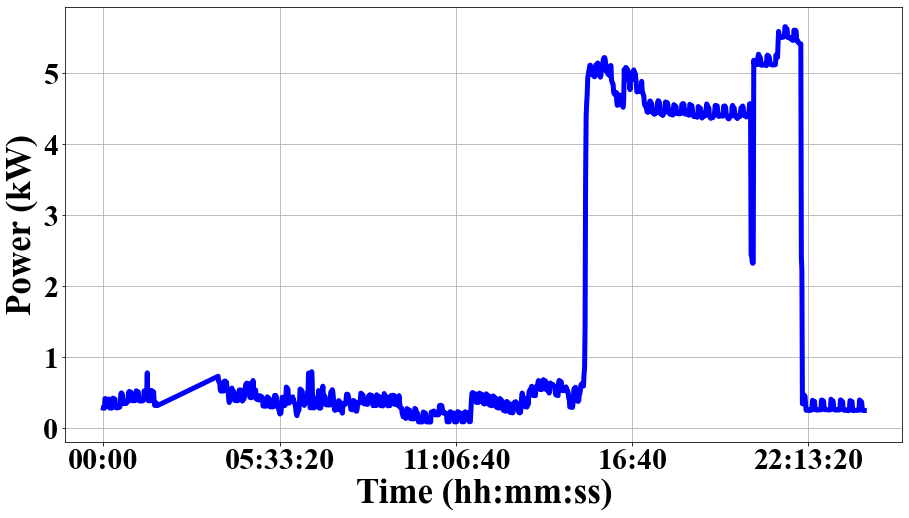

In [220]:
    df_1 = df2[(df2['Timestamp'] >='2013-05-24 00:00:00') & (df2['Timestamp'] < '2013-05-25 00:00:00')]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['kW2'].mean().plot(kind='line',linewidth= 5,figsize=(15,8),color='blue',fontsize=30)
    plt.ylabel('Power (kW)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xlabel('Time (hh:mm:ss)',fontsize=35,fontname="Times New Roman",fontweight="bold")
    #plt.title('Combined single day data',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.xticks(fontweight="bold",fontname="Times New Roman")
    plt.yticks(fontweight="bold",fontname="Times New Roman")
    plt.grid()
    plt.savefig('combined_1day.pdf')
    plt.savefig('combined_1day.png')
    plt.show()

In [28]:
df2.drop(['EV','KW'],axis=1,inplace=True)

In [29]:
df2

,Timestamp,kW2
0,2013-05-24 00:00:00,0.285567
1,2013-05-24 00:01:00,0.284514
2,2013-05-24 00:02:00,0.283383
3,2013-05-24 00:03:00,0.419192
4,2013-05-24 00:04:00,0.418726
...,...,...
105115,2013-08-04 23:55:00,0.395570
105116,2013-08-04 23:56:00,0.394976
105117,2013-08-04 23:57:00,0.393632
105118,2013-08-04 23:58:00,0.379694


In [71]:
df_scaled.iloc[84580:,:]

,kW,Day,Hour,Minute
84580,0.034063,0.666667,0.0,0.000000
84581,0.034099,0.666667,0.0,0.016949
84582,0.034063,0.666667,0.0,0.033898
84583,0.033947,0.666667,0.0,0.050847
84584,0.033098,0.666667,0.0,0.067797
...,...,...,...,...
98547,0.036018,1.000000,1.0,0.932203
98548,0.035949,1.000000,1.0,0.949153
98549,0.035791,1.000000,1.0,0.966102
98550,0.034152,1.000000,1.0,0.983051


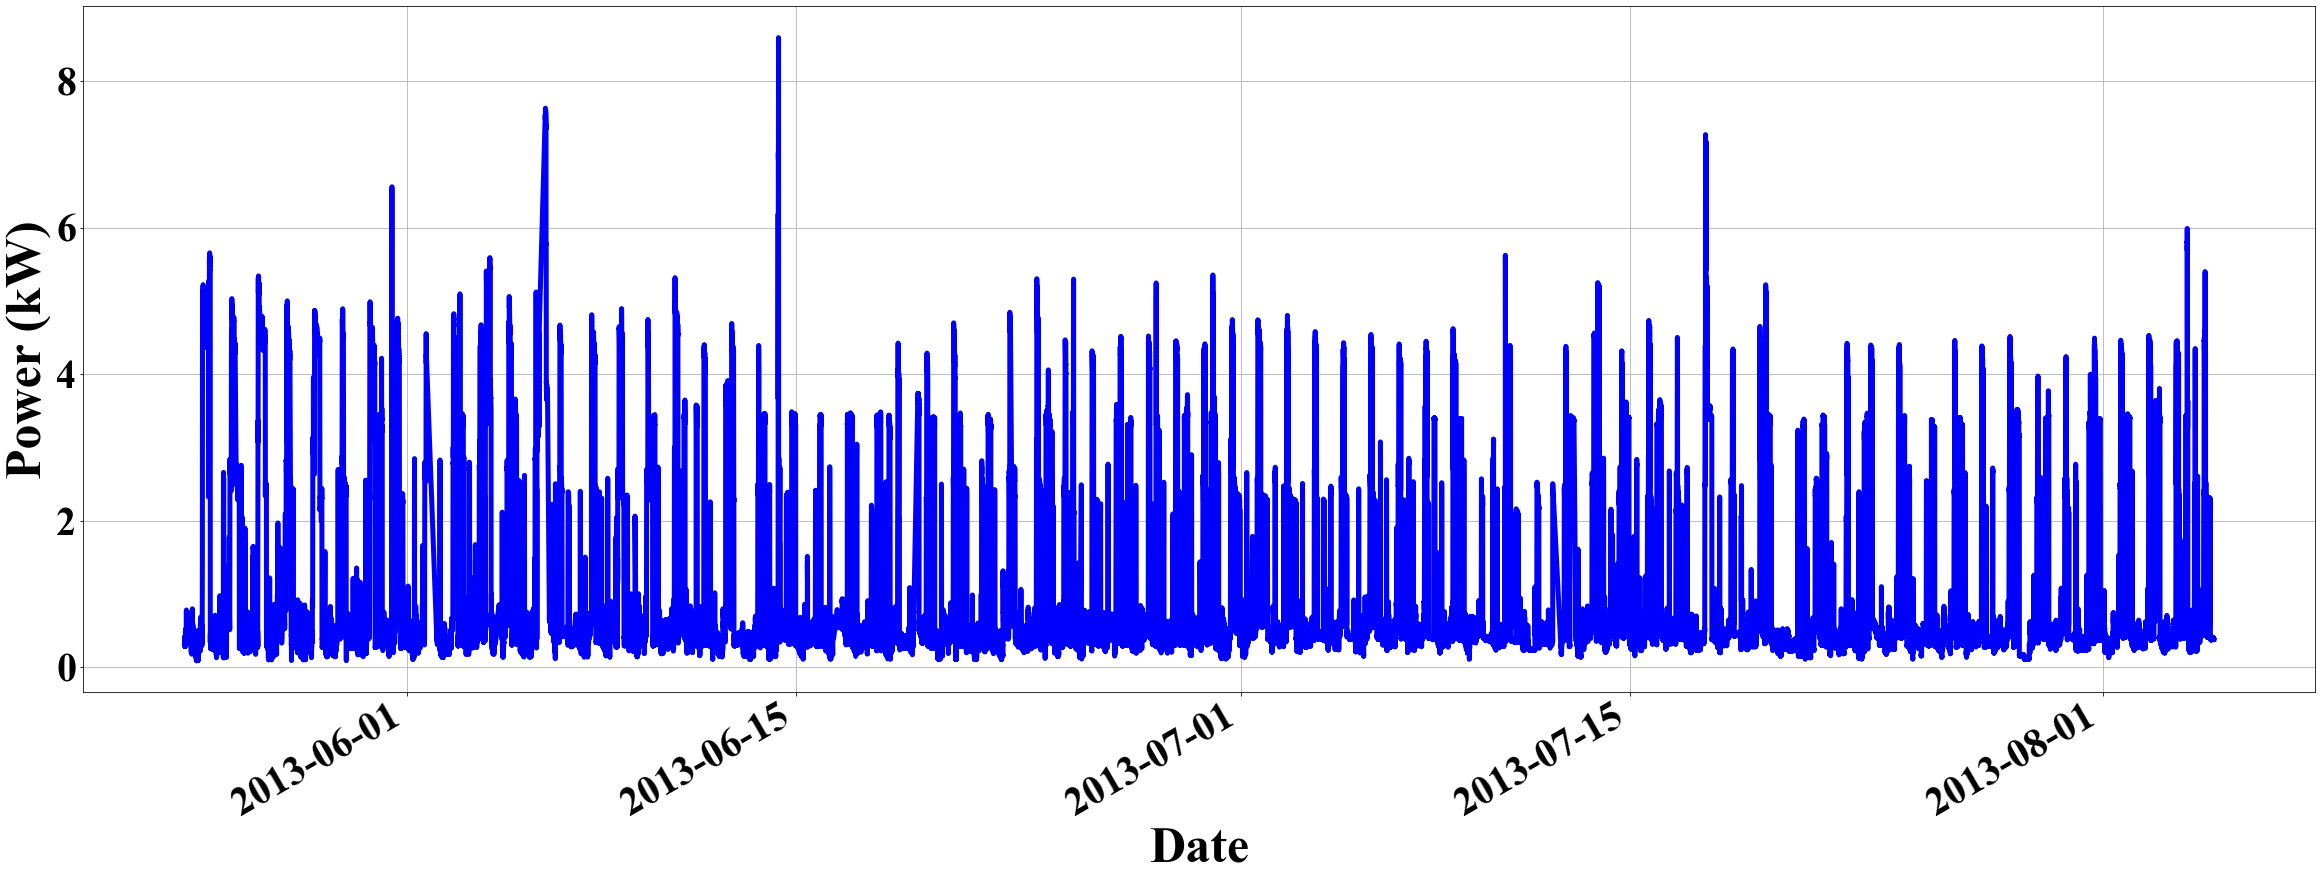

In [334]:
df2.groupby('Timestamp')['kW2'].median().plot(kind='line',linewidth= 5,figsize=(40,14),color='blue',fontsize=40)
plt.ylabel('Power (kW)',fontsize=50,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Date',fontsize=50,fontname="Times New Roman",fontweight="bold")
#plt.title('Combined Data',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xticks(fontweight="bold",fontname="Times New Roman")
plt.yticks(fontweight="bold",fontname="Times New Roman")
plt.grid()
plt.savefig('combined_total_1.pdf')
plt.savefig('combined_total_1.png')
plt.show()

In [30]:
df2['Day'] = pd.to_datetime(df2['Timestamp']).dt.dayofweek

In [31]:
df2['Hour'] = pd.to_datetime(df2['Timestamp']).dt.hour
df2['Minute']=pd.to_datetime(df2['Timestamp']).dt.minute

In [32]:
df2.drop('Timestamp',axis=1,inplace=True)

In [33]:
df2.rename(columns ={'kW2':'kW'},inplace=True)

In [34]:
#df2['kW'] = df2['kW']*1000

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df2)
df_scaled = pd.DataFrame(df_1,columns=df2.columns)
df_scaled

,kW,Day,Hour,Minute
0,0.023085,0.666667,0.0,0.000000
1,0.022962,0.666667,0.0,0.016949
2,0.022829,0.666667,0.0,0.033898
3,0.038796,0.666667,0.0,0.050847
4,0.038741,0.666667,0.0,0.067797
...,...,...,...,...
98547,0.036018,1.000000,1.0,0.932203
98548,0.035949,1.000000,1.0,0.949153
98549,0.035791,1.000000,1.0,0.966102
98550,0.034152,1.000000,1.0,0.983051


In [36]:
X=df_scaled.drop('kW',axis=1)
y=df_scaled['kW']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [37]:
df_scaled.isnull().sum()

kW        0
Day       0
Hour      0
Minute    0
dtype: int64

In [38]:
median = df_scaled['kW'].median()
df_scaled['kW'].fillna(value=median,inplace=True)

In [39]:
training_size=int(len(df_scaled)*0.858227129)
test_size=len(df_scaled)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:4],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df_scaled),1:4],df_scaled.iloc[training_size:len(df_scaled),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(84580, 3) (84580,) (13972, 3) (13972,)


In [40]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [41]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(1,3)))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_history=model1.fit(X_train, y_train, batch_size = 128,epochs = 100, validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
661/661 [==============================] - 26s 13ms/step - loss: 0.0198 - val_loss: 0.0166
Epoch 2/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0195 - val_loss: 0.0167
Epoch 3/100
661/661 [==============================] - 6s 8ms/step - loss: 0.0195 - val_loss: 0.0162
Epoch 4/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0194 - val_loss: 0.0165
Epoch 5/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0194 - val_loss: 0.0166
Epoch 6/100
661/661 [==============================] - 7s 10ms/step - loss: 0.0194 - val_loss: 0.0162
Epoch 7/100
661/661 [==============================] - 7s 11ms/step - loss: 0.0193 - val_loss: 0.0159
Epoch 8/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0190 - val_loss: 0.0153
Epoch 9/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0183 - val_loss: 0.0152
Epoch 10/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0181 - va

Epoch 81/100
661/661 [==============================] - 5s 8ms/step - loss: 0.0142 - val_loss: 0.0118
Epoch 82/100
661/661 [==============================] - 6s 10ms/step - loss: 0.0142 - val_loss: 0.0116
Epoch 83/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0142 - val_loss: 0.0114
Epoch 84/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0142 - val_loss: 0.0118
Epoch 85/100
661/661 [==============================] - 6s 9ms/step - loss: 0.0142 - val_loss: 0.0117
Epoch 86/100
661/661 [==============================] - 7s 10ms/step - loss: 0.0142 - val_loss: 0.0116
Epoch 87/100
661/661 [==============================] - 7s 11ms/step - loss: 0.0142 - val_loss: 0.0115
Epoch 88/100
661/661 [==============================] - 7s 10ms/step - loss: 0.0142 - val_loss: 0.0120
Epoch 89/100
661/661 [==============================] - 7s 10ms/step - loss: 0.0142 - val_loss: 0.0116
Epoch 90/100
661/661 [==============================] - 7s 10ms/step - loss: 

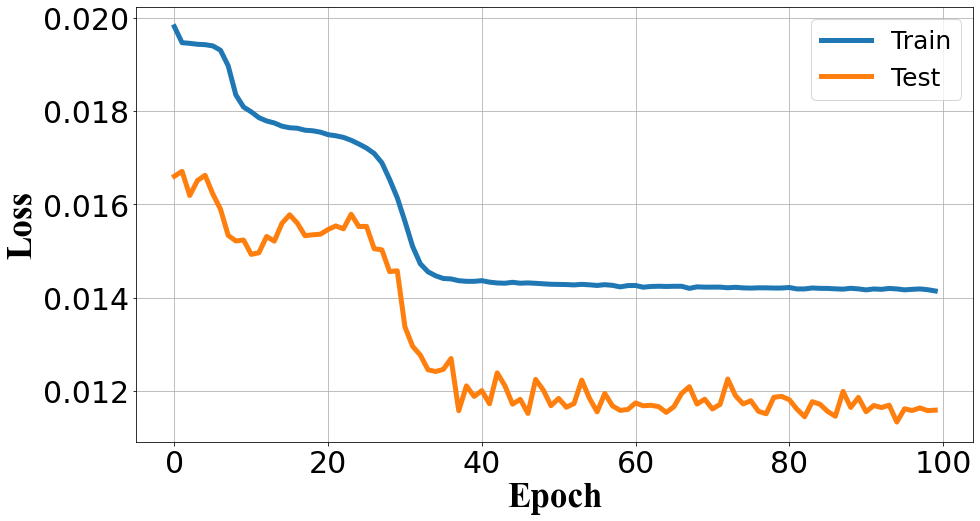

In [44]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['loss'],linewidth=5)
plt.plot(model_history.history['val_loss'],linewidth=5)
#plt.title('Model Loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.ylabel('Loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Epoch',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.legend(['Train', 'Test'], loc='upper right',fontsize=25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('Cmodel.png')
plt.savefig('Cmodel.pdf')
plt.grid()
plt.show()

In [79]:
size = df_scaled.shape[1]

In [80]:
size

4

In [81]:
yhat = model1.predict(X_test)

In [82]:
yhat

array([[0.1290398 ],
       [0.12926544],
       [0.12949616],
       ...,
       [0.17293622],
       [0.17240326],
       [0.17187254]], dtype=float32)

In [83]:
y_test

array([0.03406327, 0.03409896, 0.03406308, ..., 0.03579053, 0.03415184,
       0.03415169])

In [84]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [85]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(13972,)

In [86]:
inv_yhat

array([1.18677628, 1.18869557, 1.19065794, ..., 1.56014326, 1.55561014,
       1.55109603])

In [87]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(13972,)

In [88]:
inv_y

array([0.37894058, 0.37924411, 0.37893897, ..., 0.39363203, 0.37969388,
       0.37969261])

In [89]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.926


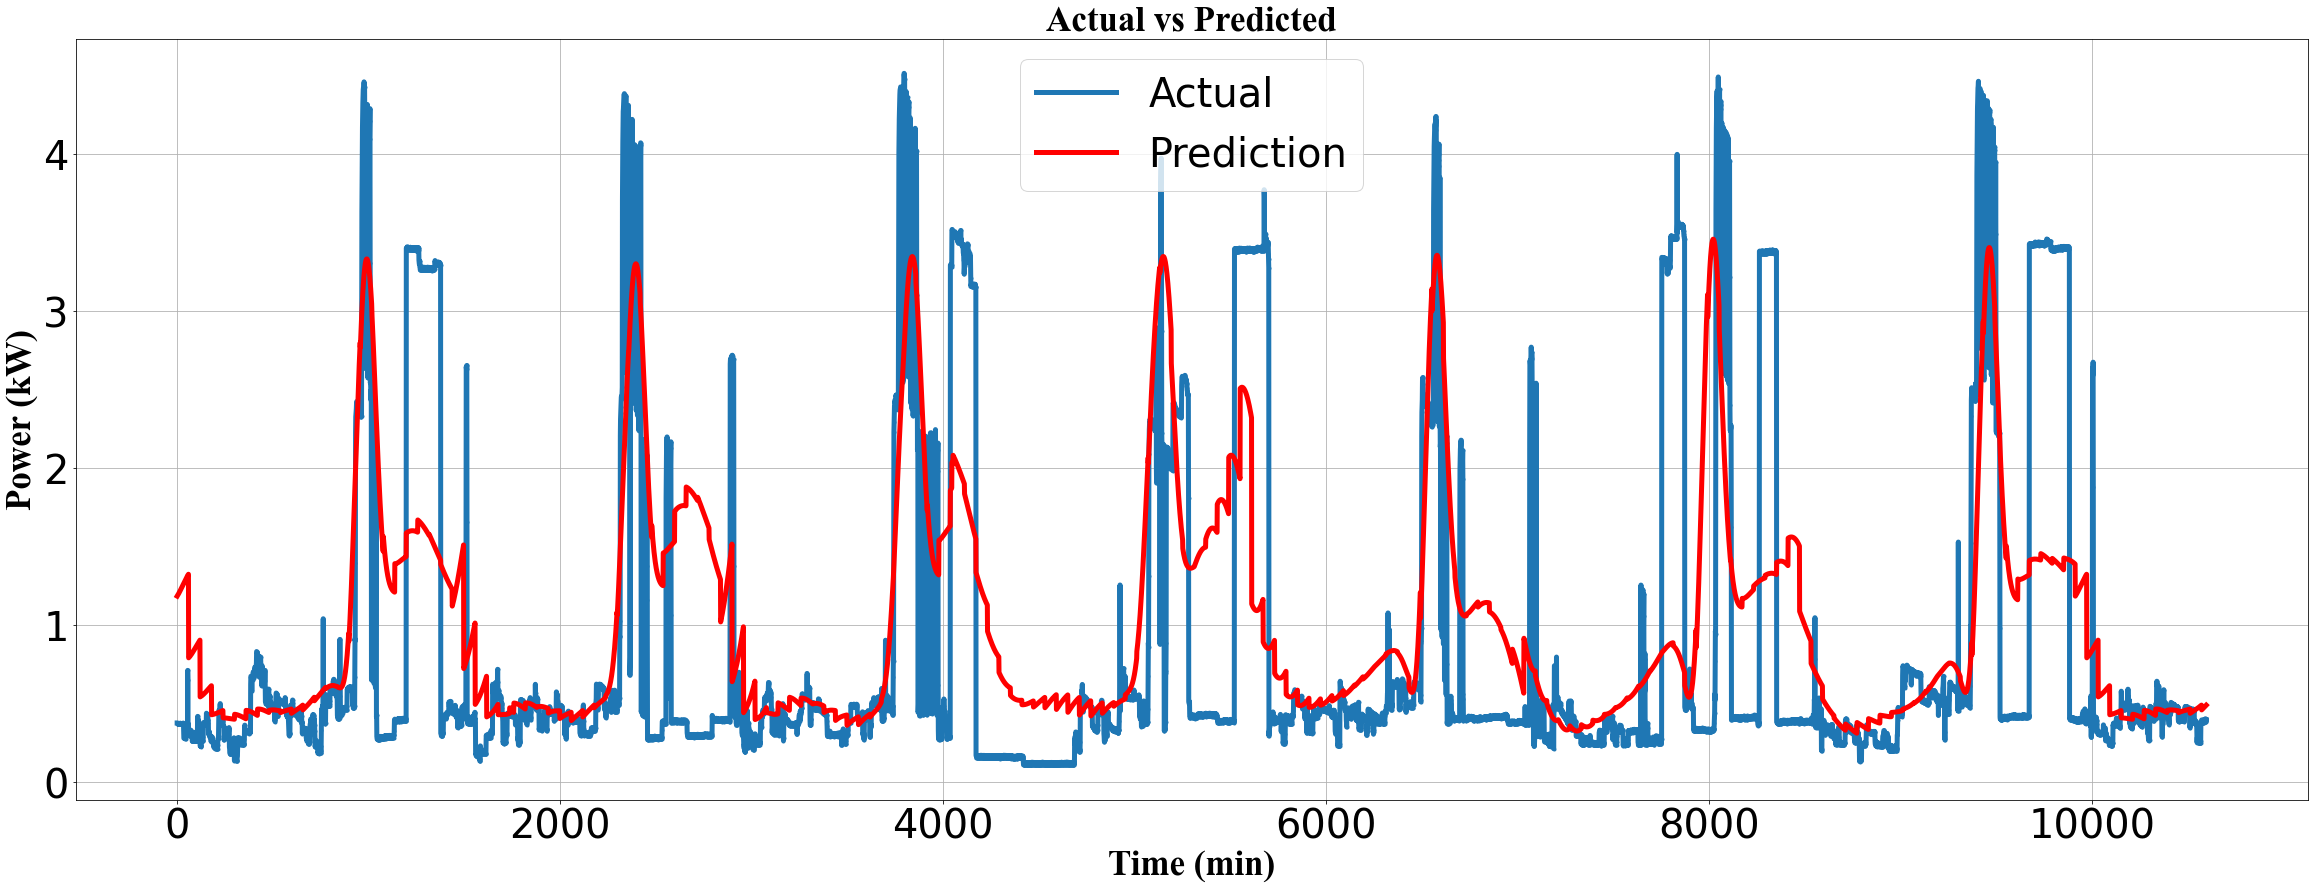

In [339]:
y=0
for i in range(10600,14400,10600):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(40,14)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="Actual",linewidth=5)
    plt.plot(aa, inv_yhat[y:i], 'r', label="Prediction",linewidth=5)
    y = i
    plt.xlabel('Time (min)',fontsize=50,fontname="Times New Roman",fontweight="bold")
    plt.ylabel('Power (kW)',fontsize=5,fontname="Times New Roman",fontweight="bold")
    plt.title('Actual vs Predicted',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.legend(fontsize=40)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.grid()
    plt.savefig('C_pred.pdf')
    plt.savefig('C_pred.png')
    plt.show()

In [91]:
inv_y.sum()/60

219.24224415351034

In [92]:
inv_yhat.sum()/60

243.6138011988309

In [143]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
# units is output and kernel_initializer is weight intialization technique
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 3))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [144]:
model_history=classifier.fit(X_train, y_train,validation_split=0.2, batch_size = 256,epochs = 50)

Epoch 1/50
266/266 [==============================] - 2s 4ms/step - loss: 0.0230 - val_loss: 0.0084
Epoch 2/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0081
Epoch 3/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0079
Epoch 4/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0080
Epoch 5/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0076
Epoch 6/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0111 - val_loss: 0.0075
Epoch 7/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0109 - val_loss: 0.0076
Epoch 8/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0073
Epoch 9/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0104 - val_loss: 0.0074
Epoch 10/50
266/266 [==============================] - 1s 3ms/step - loss: 0.0102 - val_loss: 0.0073

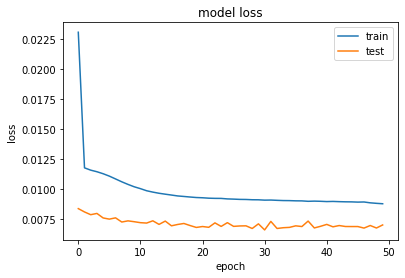

In [145]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [146]:
yhat = classifier.predict(X_test)

In [147]:
size = df2.shape[1]
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(21211,)

In [148]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(21211,)

In [149]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.728


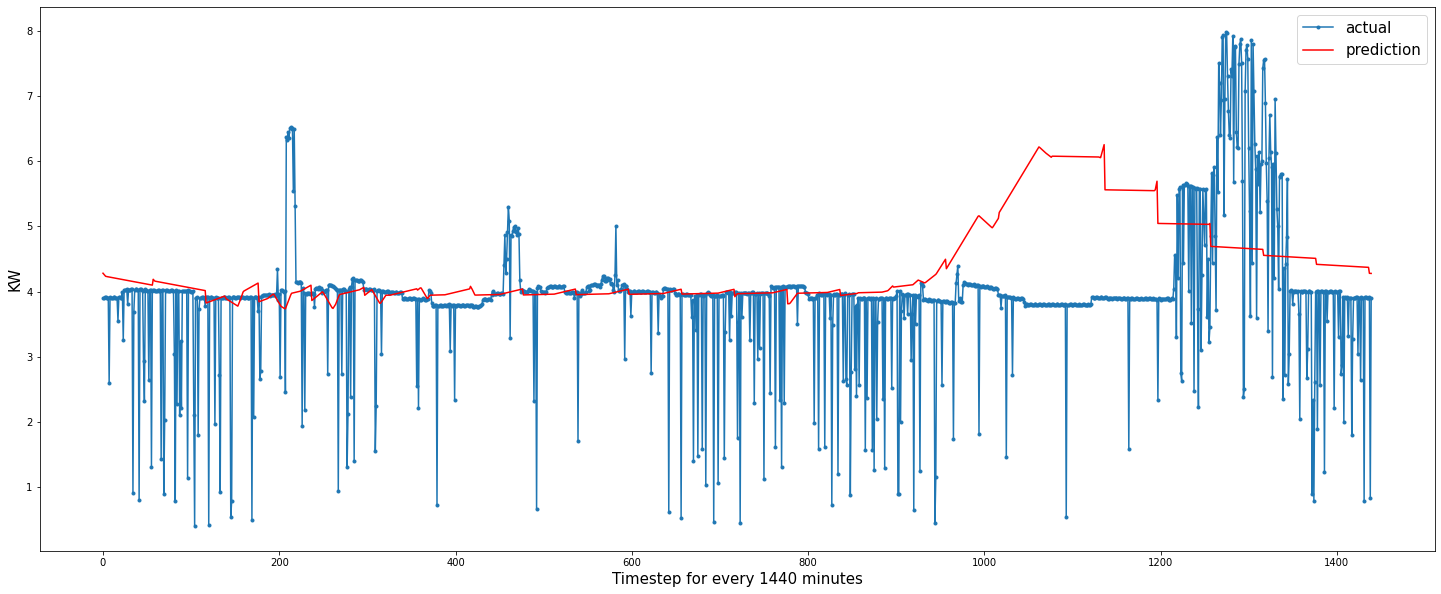

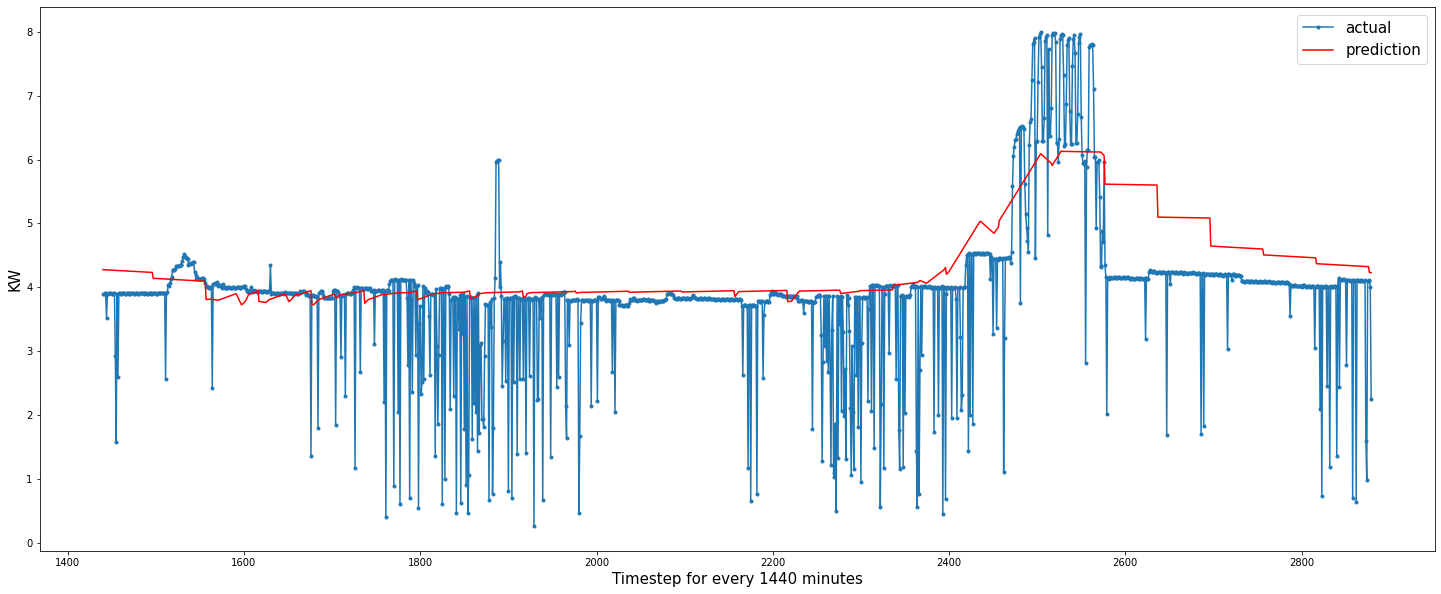

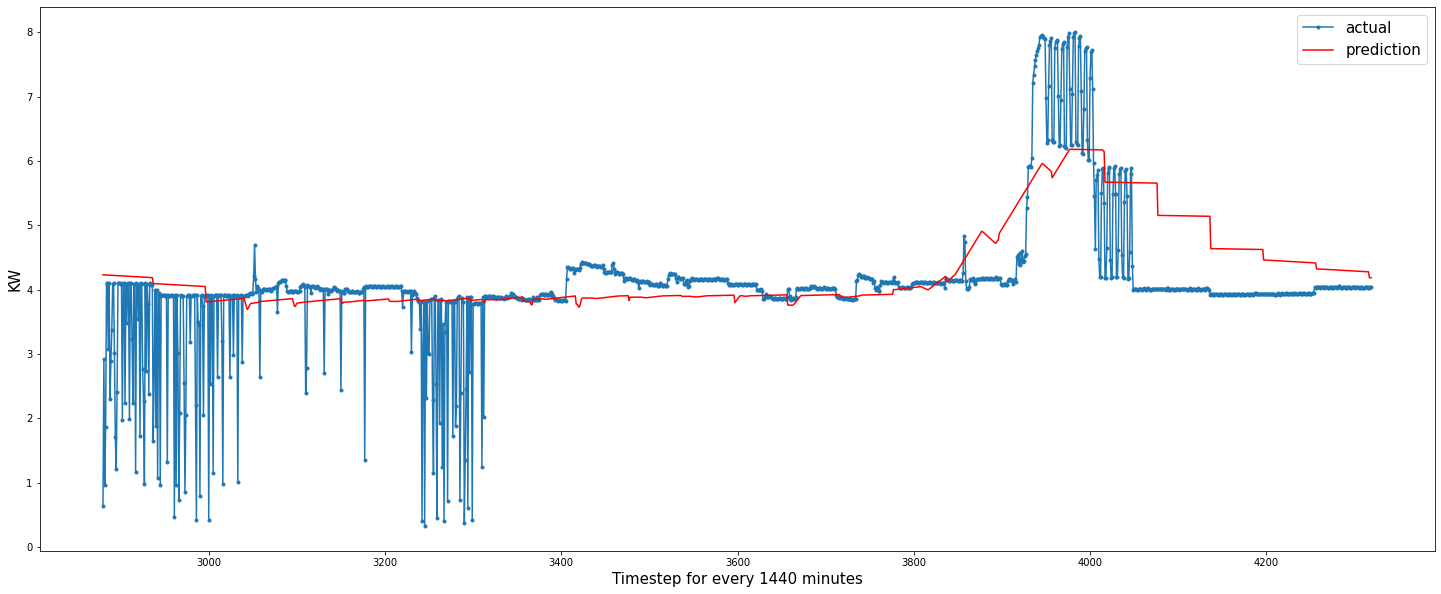

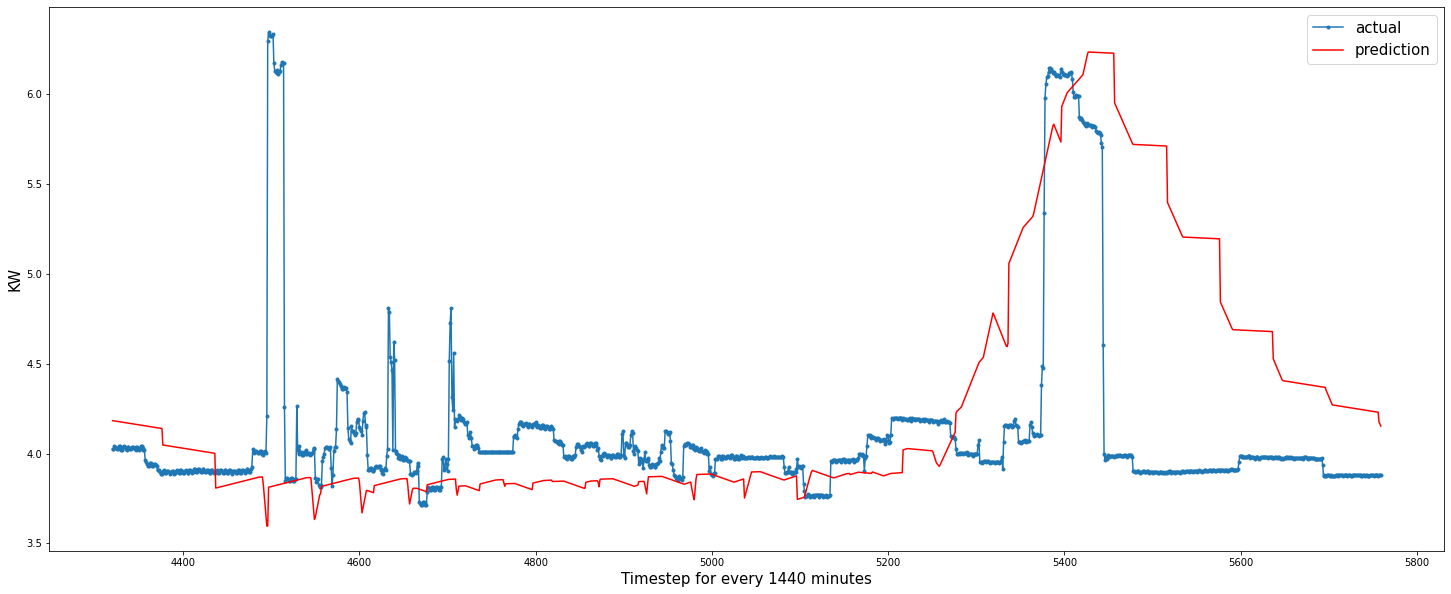

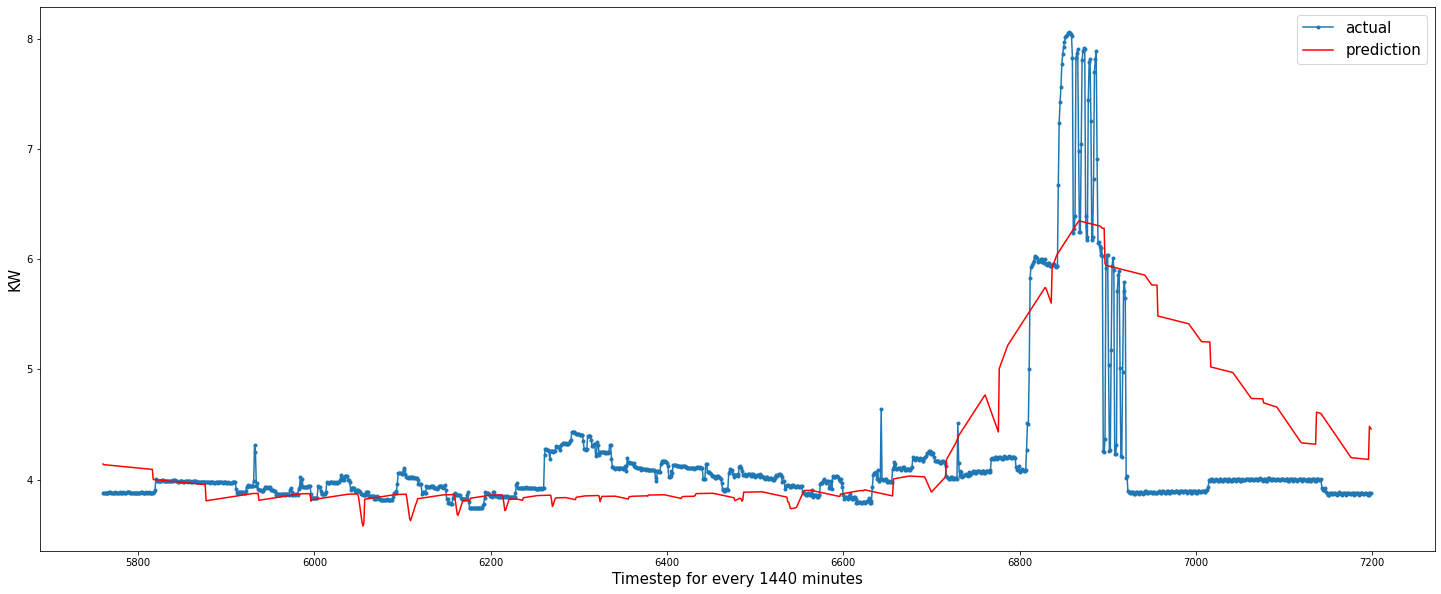

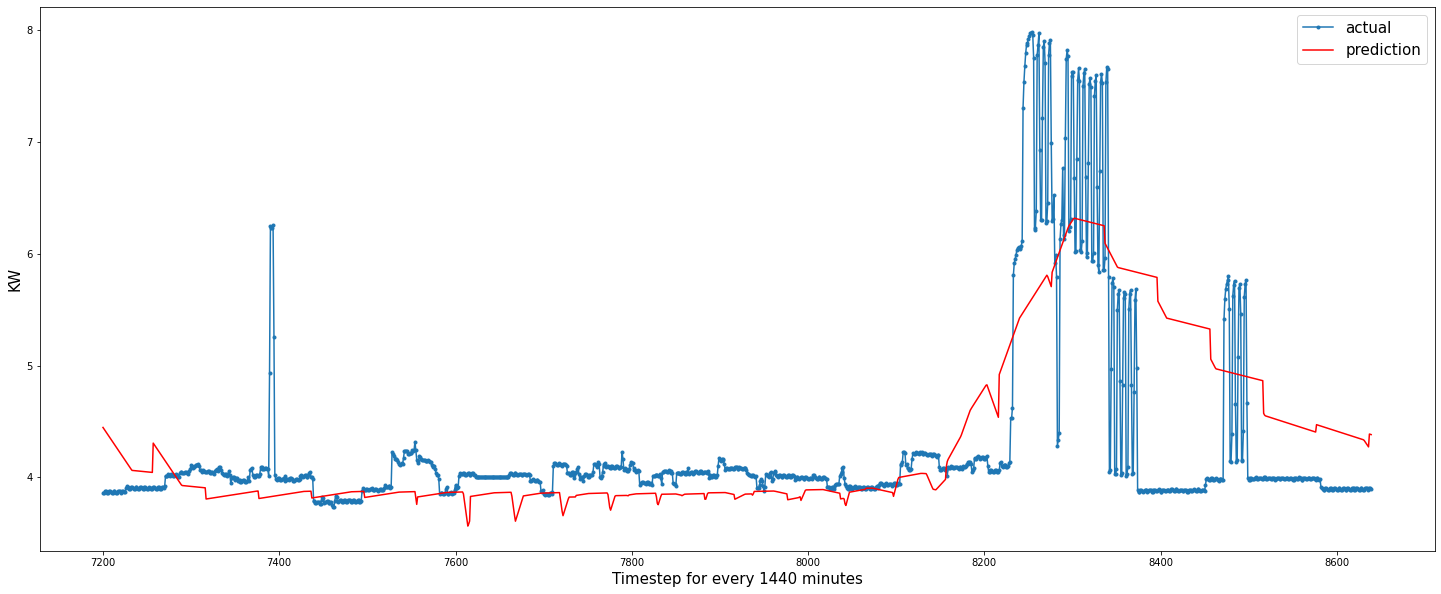

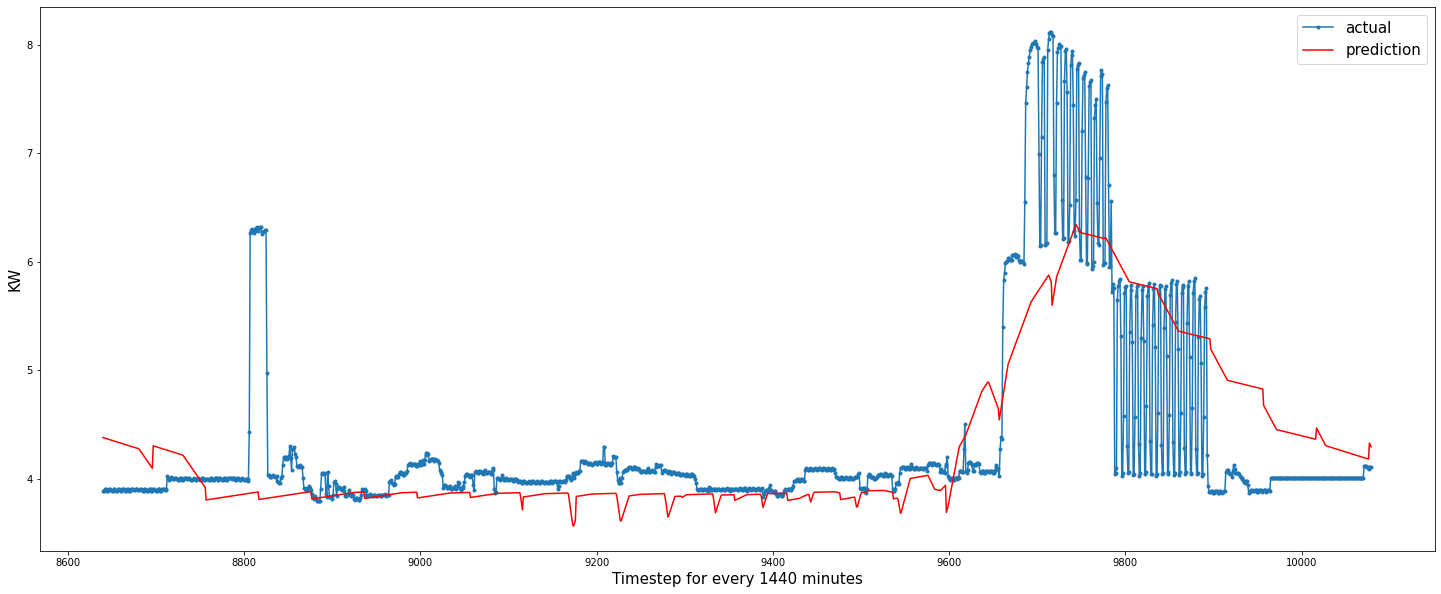

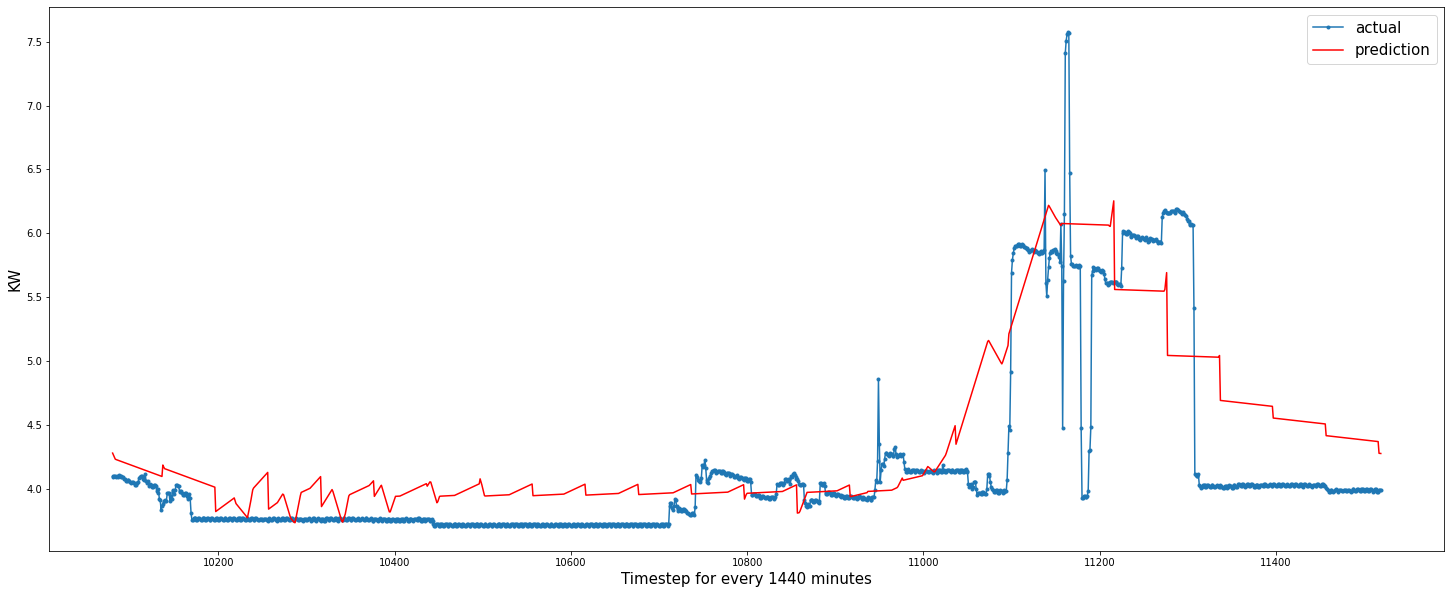

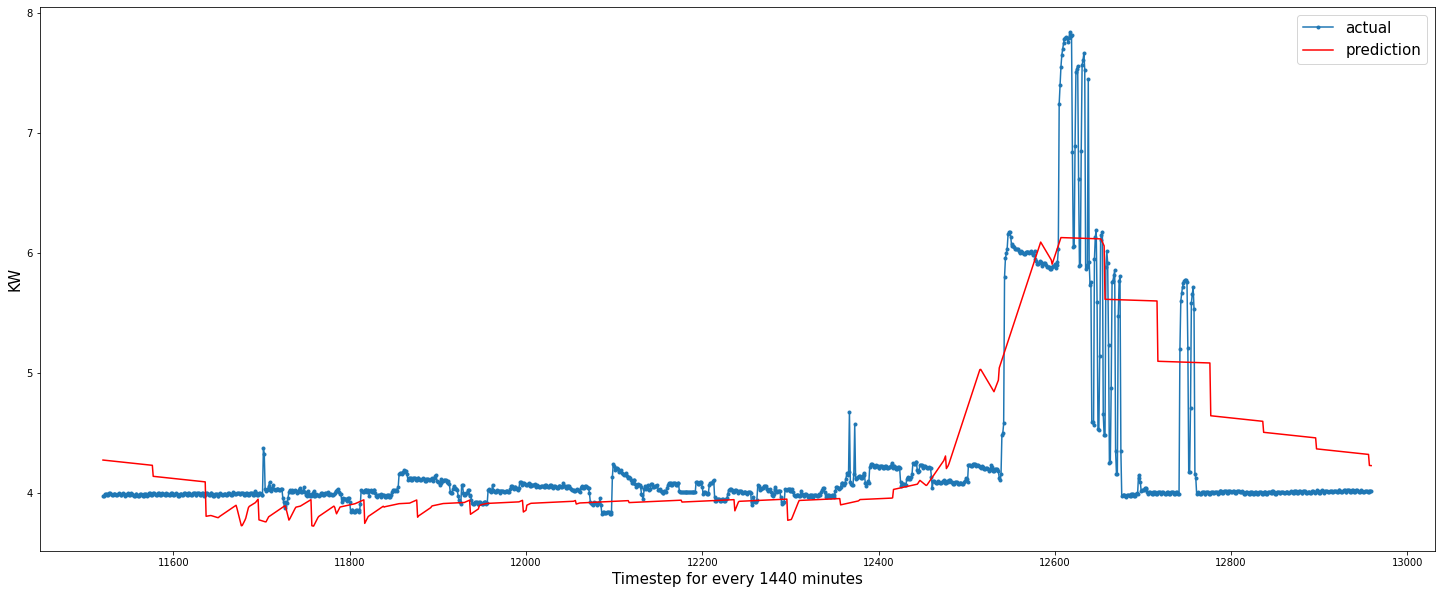

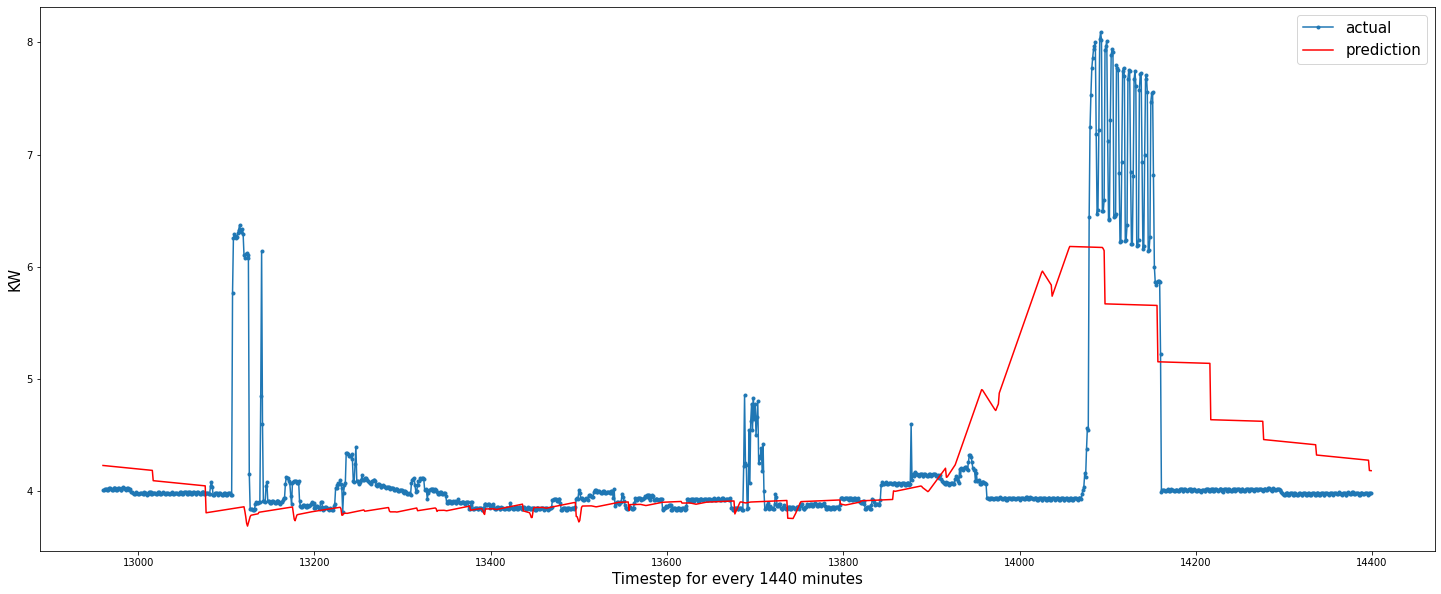

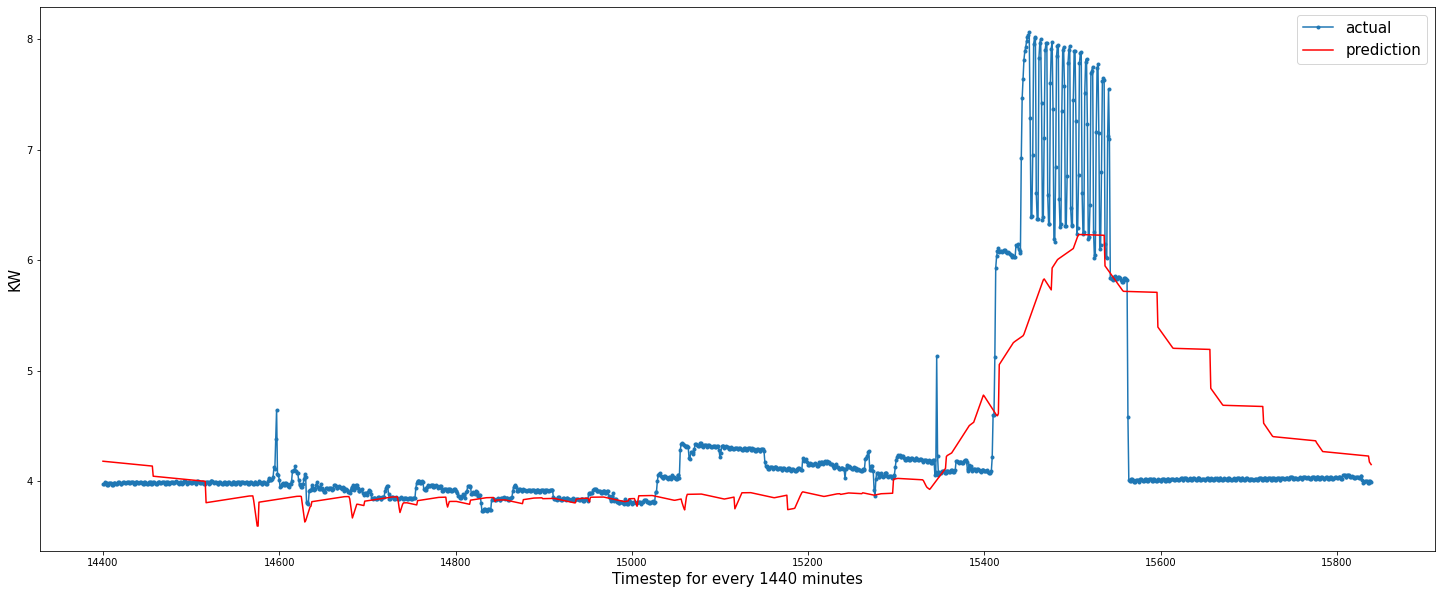

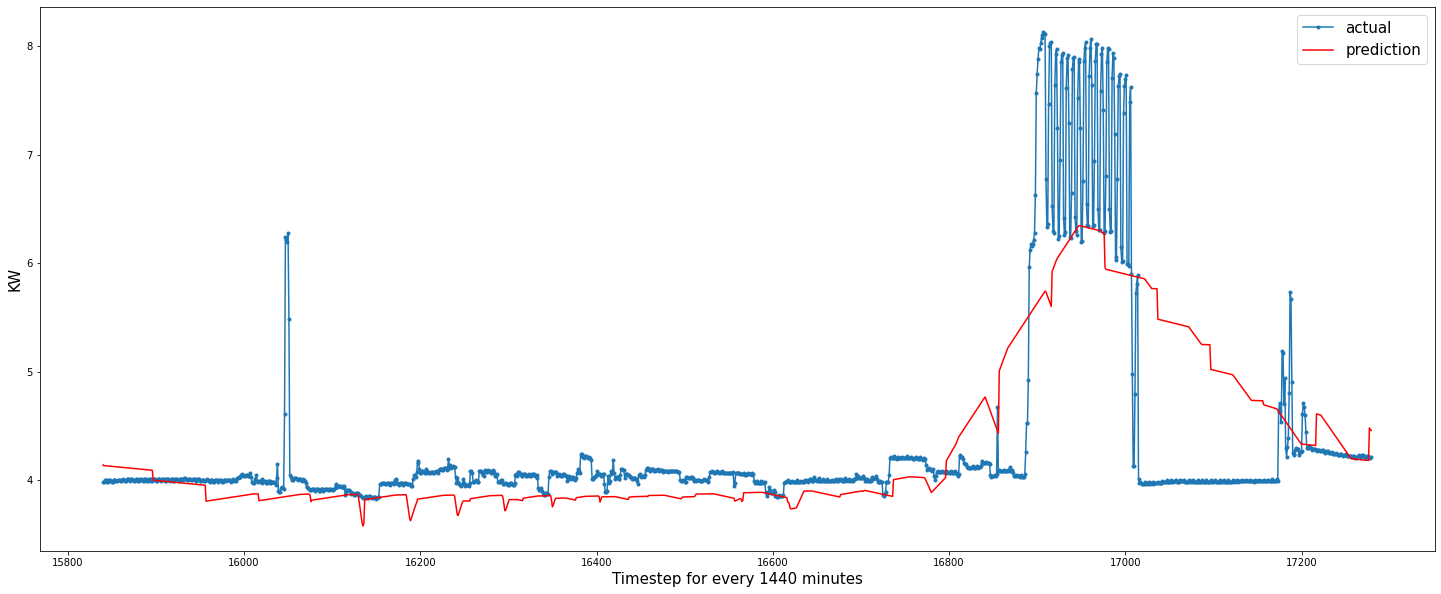

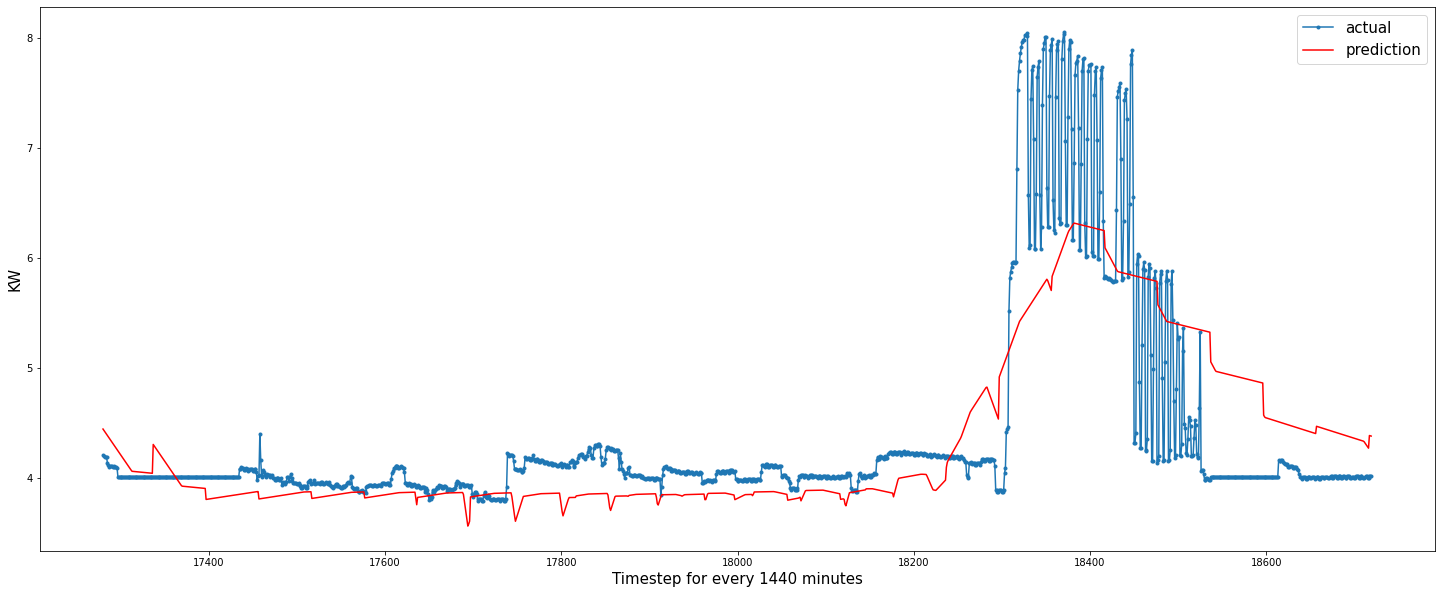

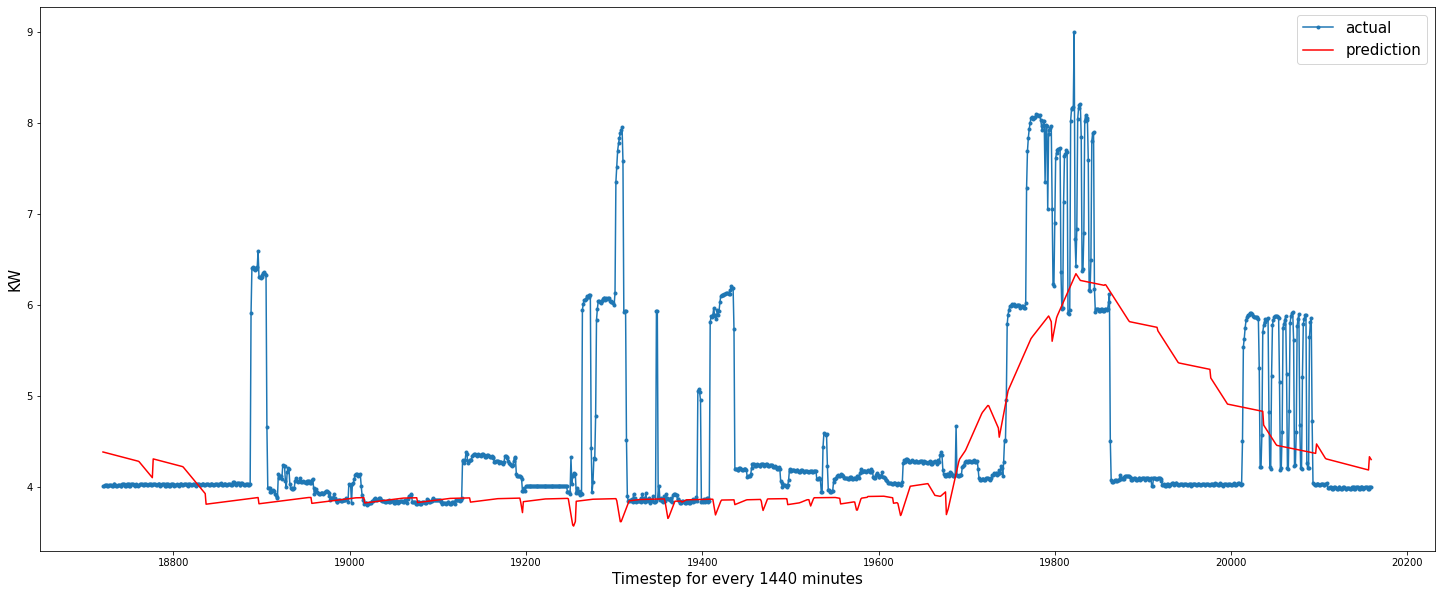

In [151]:
y=0
for i in range(1440,21211,1440):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel('KW', size=15)
    plt.xlabel('Timestep for every 1440 minutes', size=15)
    plt.legend(fontsize=15)
    plt.show()